In [6]:

import pytz
import spacepy.irbempy as ib
import spacepy.time as spt
import spacepy.LANLstar as sl
from spacepy import radbelt as rb
import datetime as dt
import spacepy.time as spt
import spacepy.omni as om
import numpy as np
from pysatdata.loaders.load import *
import datetime
from download_kp import down_kp
import pandas as pd
import matplotlib.pyplot as plt
import json
from scipy import interpolate as interp
# import numba
# from numba import jit

Error in sys.excepthook:
Traceback (most recent call last):
  File "/home/jose/python_projects/lastClosedDS_LANLstar/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1958, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jose/python_projects/lastClosedDS_LANLstar/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1960, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/home/jose/python_projects/lastClosedDS_LANLstar/venv/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/jose/python_projects/lastClosedDS_LANLstar/venv/lib/python3.10/site-packages/IPython/core/ultratb.py", line 999, in structured_traceback
    retur

ImportError: numpy.core.multiarray failed to import

In [2]:
stringInstant = '2014-04-07'

# stringInstant = dataT.index[0].split(" ")[0]
instDate = datetime.datetime.strptime(stringInstant, '%Y-%m-%d')


inidate = instDate - datetime.timedelta(days = 1)
enddate = instDate + datetime.timedelta(days = 1)
trange0 = [inidate.strftime('%Y-%m-%d'), enddate.strftime('%Y-%m-%d')]
trange= [(inidate - datetime.timedelta(days = 1)).strftime('%Y-%m-%d'),
         (enddate + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')]

config_file_sat = '/home/jose/python_projects/pySatData/pysatdata/resources/config_file.json'

lshellOrlStar = 'L-Star'
probe = 'a'

In [3]:
pytplot.del_data()
varss_aceSwe = load_sat(trange=trange, satellite='omni',
                    probe=['omni'], rel='rel03',
                    instrument='omni_cdaweb',datatype='hro_1min',
                    config_file=config_file_sat, downloadonly=False,
                    usePandas=True, usePyTplot=False)

quants_Swe = pytplot.data_quants['proton_density']
time_swe = quants_Swe.coords['time'].values
time_dt_swe = [datetime.datetime.fromtimestamp(i, pytz.timezone("UTC")) for i in time_swe]
nP = pytplot.data_quants['proton_density'].values
bgse_x = pytplot.data_quants['BX_GSE'].values
bgse_y = pytplot.data_quants['BY_GSE'].values
bgse_z = pytplot.data_quants['BZ_GSE'].values
b_total = pytplot.data_quants['F'].values
flow_speed = pytplot.data_quants['flow_speed'].values
imf = pytplot.data_quants['IMF'].values
ae_index = pytplot.data_quants['AE_INDEX'].values
symH_index = pytplot.data_quants['SYM_H'].values


varss_aceSwe.index = pd.to_datetime(time_dt_swe)


2022-03-03 13:43:57.562 | INFO     | pysatdata.loaders.load:load_sat:49 - Local Download Path: /home/jose/sat_data/omni
2022-03-03 13:43:57.564 | WARNING  | pysatdata.loaders.load:load_sat:54 - Selecting the sub path key
2022-03-03 13:43:57.565 | INFO     | pysatdata.utils.library_functions:testRemoteDir:233 - Testing Connection
2022-03-03 13:43:58.155 | WARNING  | pysatdata.utils.library_functions:testRemoteDir:239 - Using https://spdf.gsfc.nasa.gov/pub/data/omni/...
2022-03-03 13:43:58.157 | INFO     | pysatdata.loaders.load:load_sat:58 - Remotepath: https://spdf.gsfc.nasa.gov/pub/data/omni/
2022-03-03 13:43:58.157 | INFO     | pysatdata.loaders.load:load_sat:69 - Remote_file_path: omni_cdaweb/hro_1min/%Y/omni_hro_1min_%Y%m01_v*.cdf
2022-03-03 13:43:58.170 | INFO     | pysatdata.utils.download:download:213 - Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2014/
2022-03-03 13:43:58.964 | INFO     | pysatdata.utils.download:download_file:72 - Fil

In [69]:
doys = [x.strftime('%j') for x in varss_aceSwe.index]
housr = [((x.hour * 60) + x.minute) / 60 for x in  varss_aceSwe.index]
varss_aceSwe['DOY'] = doys
varss_aceSwe['HRS'] = housr

In [6]:
pytplot.del_data()
varss_rept = load_sat(trange=trange, satellite='rbsp',
                    probe=[probe], level='3', 
                    rel='rel03', instrument='rept',
                    datatype='sectors',varnames=['FEDU', 'L_star', 'L'],
                    config_file=config_file_sat, downloadonly=False, 
                    usePandas=False, usePyTplot=True)
quants_fedu_rept = pytplot.data_quants['FEDU']
l_star = pytplot.data_quants['L_star'].values
l_m = pytplot.data_quants['L'].values

2022-03-03 13:44:35.139 | INFO     | pysatdata.loaders.load:load_sat:49 - Local Download Path: /home/jose/sat_data/rbsp
2022-03-03 13:44:35.140 | WARNING  | pysatdata.loaders.load:load_sat:54 - Selecting the sub path key
2022-03-03 13:44:35.141 | INFO     | pysatdata.utils.library_functions:testRemoteDir:233 - Testing Connection
2022-03-03 13:44:35.796 | WARNING  | pysatdata.utils.library_functions:testRemoteDir:239 - Using https://spdf.gsfc.nasa.gov/pub/data/rbsp/...
2022-03-03 13:44:35.800 | INFO     | pysatdata.loaders.load:load_sat:58 - Remotepath: https://spdf.gsfc.nasa.gov/pub/data/rbsp/
2022-03-03 13:44:35.802 | INFO     | pysatdata.loaders.load:load_sat:69 - Remote_file_path: rbspa/l3/ect/rept/sectors/rel03/%Y/rbspa_rel03_ect-rept-sci-l3_%Y%m%d_v*.cdf
2022-03-03 13:44:35.804 | INFO     | pysatdata.utils.download:download:213 - Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/ect/rept/sectors/rel03/2014/
2022-03-03 13:44:37.215 | INFO     | pysatdata.u

In [7]:
time_rept = quants_fedu_rept.coords['time'].values
time_dt_rept = [datetime.datetime.fromtimestamp(i, pytz.timezone("UTC")) for i in time_rept]
df_rept = pd.DataFrame(l_star, index=time_dt_rept, columns=['L-Star'])

In [67]:
kpDf = down_kp(datetime.datetime.strptime(trange[0], '%Y-%m-%d'), datetime.datetime.strptime(trange[1], '%Y-%m-%d'),
                 dataPath='./data_KP/', downloadData=1)
fls = interp.interp1d((np.arange(0, len(kpDf['Kp'].values))), kpDf['Kp'].values, bounds_error=False)
lsnewy = np.linspace(0, len(kpDf['Kp'].values), len(varss_aceSwe.index))
kp_intep = fls(lsnewy)
varss_aceSwe['Kp'] = kp_intep

Kp_ap_2014.txt
Kp_ap_2014.txt already at: ./data_KP/


In [85]:
varss_aceSwe.columns

Index(['IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'percent_interp', 'Timeshift',
       'RMS_Timeshift', 'RMS_phase', 'Time_btwn_obs', 'F', 'BX_GSE', 'BY_GSE',
       'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'RMS_SD_B', 'RMS_SD_fld_vec',
       'flow_speed', 'Vx', 'Vy', 'Vz', 'proton_density', 'T', 'Pressure', 'E',
       'Beta', 'Mach_num', 'Mgs_mach_num', 'x', 'y', 'z', 'BSN_x', 'BSN_y',
       'BSN_z', 'AE_INDEX', 'AL_INDEX', 'AU_INDEX', 'SYM_D', 'SYM_H', 'ASY_D',
       'ASY_H', 'PC_N_INDEX', 'DOY', 'Kp', 'HRS'],
      dtype='object')

In [86]:
outs = []
for i in range(varss_aceSwe.shape[0]):
    dat = {
                'Kp'     : np.array([varss_aceSwe.iloc[i]['Kp']]),
                'Dst'    : np.array([varss_aceSwe.iloc[i]['SYM_H']]),
                'dens'   : np.array([varss_aceSwe.iloc[i]['proton_density']]),
                'velo'   : np.array([varss_aceSwe.iloc[i]['flow_speed']]),
                'Pdyn'   : np.array([varss_aceSwe.iloc[i]['Pressure']]),
                'ByIMF'  : np.array([varss_aceSwe.iloc[i]['BY_GSM']]),
                'BzIMF'  : np.array([varss_aceSwe.iloc[i]['BZ_GSM']]),
                'G1'     : np.array([1.02966]),
                'G2'     : np.array([0.54933]),
                'G3'     : np.array([0.81399]),
                'W1'     : np.array([0.12244]),
                'W2'     : np.array([0.2514 ]),
                'W3'     : np.array([0.0892 ]),
                'W4'     : np.array([0.0478 ]),
                'W5'     : np.array([0.2258 ]),
                'W6'     : np.array([1.0461 ]),
                'Year'   : np.array([varss_aceSwe.index[i].year]),
                'DOY'    : np.array([varss_aceSwe.iloc[i]['DOY']]),
                'Hr'     : np.array([varss_aceSwe.iloc[i]['HRS']]),
                'PA'     : np.array([87.3875])}

KeyboardInterrupt: 

In [76]:
expected_lmax = {'OPDYN'   : np.array([10.6278]),
                          'OPQUIET' : np.array([9.3352]),
                          'T01QUIET': np.array([10.0538]),
                          'T01STORM': np.array([9.9300]),
                          'T89'     : np.array([8.2888]),
                          'T96'     : np.array([8.2410]),
                          'T05'    : np.array([9.9295])}

In [77]:
Bmodels = ['OPDYN','OPQUIET','T01QUIET','T01STORM','T89','T96','T05']

In [78]:
actual = sl.LANLmax(dat, Bmodels)

In [79]:
actual

{'OPDYN': array([10.62587259]),
 'OPQUIET': array([9.33781189]),
 'T01QUIET': array([10.0300971]),
 'T01STORM': array([9.91675895]),
 'T89': array([7.27245914]),
 'T96': array([9.26556856]),
 'T05': array([9.90567697])}

In [9]:
for key in Bmodels:
    np.testing.assert_almost_equal(expected_lmax[key], actual[key], decimal=4)

NameError: name 'Bmodels' is not defined

In [57]:
spt.Ticktock(df_rept.index)

Ticktock( [Timestamp('2014-03-31 00:00:05.752000+0000', tz='UTC')
 Timestamp('2014-03-31 00:00:16.585000+0000', tz='UTC')
 Timestamp('2014-03-31 00:00:27.417000+0000', tz='UTC') ...
 Timestamp('2014-04-13 23:59:15.501000+0000', tz='UTC')
 Timestamp('2014-04-13 23:59:26.326000+0000', tz='UTC')
 Timestamp('2014-04-13 23:59:37.151000+0000', tz='UTC')], dtype=UTC)

In [10]:
LCDS = ib.find_LCDS(spt.Ticktock(df_rept.index[0:1], 'ISO'),alpha=86, extMag='T05')

In [11]:
LCDS

{'LCDS': dmarray([9.16306926]),
 'K': dmarray([6.46376187e-05]),
 'UTC': dmarray([Timestamp('2014-03-31 00:00:05.752000')], dtype=object),
 'AlphaEq': dmarray([86])}

In [16]:
with open(f'/home/jose/python_projects/rbsp_flux_sw_sea/dataJson/CME_FluxEnhRed2_AB_Lst_asfreq.json', 'r') as f:
	dataFlux = json.load(f)

In [24]:
ttime  = dataFlux['enhancement']['2012-10-08 15:00:00.000000']['time']
ddata  = dataFlux['enhancement']['2012-10-08 15:00:00.000000']['data']

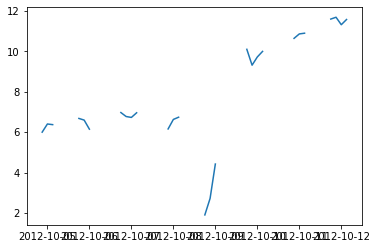

In [45]:
plt.plot(pd.to_datetime(ttime), np.log(ddata['5.5']))

In [53]:
LCDS = ib.find_LCDS(spt.Ticktock(ttime, 'ISO'),alpha=90, extMag='T89')

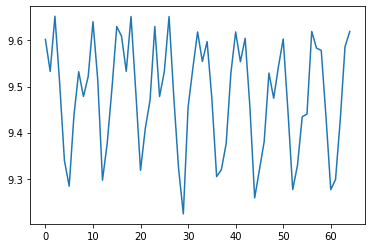

In [55]:
plt.plot(LCDS['LCDS'])

In [35]:
ttime

['2012-10-04 15:00:00.000000',
 '2012-10-04 18:00:00.000000',
 '2012-10-04 21:00:00.000000',
 '2012-10-05 00:00:00.000000',
 '2012-10-05 03:00:00.000000',
 '2012-10-05 06:00:00.000000',
 '2012-10-05 09:00:00.000000',
 '2012-10-05 12:00:00.000000',
 '2012-10-05 15:00:00.000000',
 '2012-10-05 18:00:00.000000',
 '2012-10-05 21:00:00.000000',
 '2012-10-06 00:00:00.000000',
 '2012-10-06 03:00:00.000000',
 '2012-10-06 06:00:00.000000',
 '2012-10-06 09:00:00.000000',
 '2012-10-06 12:00:00.000000',
 '2012-10-06 15:00:00.000000',
 '2012-10-06 18:00:00.000000',
 '2012-10-06 21:00:00.000000',
 '2012-10-07 00:00:00.000000',
 '2012-10-07 03:00:00.000000',
 '2012-10-07 06:00:00.000000',
 '2012-10-07 09:00:00.000000',
 '2012-10-07 12:00:00.000000',
 '2012-10-07 15:00:00.000000',
 '2012-10-07 18:00:00.000000',
 '2012-10-07 21:00:00.000000',
 '2012-10-08 00:00:00.000000',
 '2012-10-08 03:00:00.000000',
 '2012-10-08 06:00:00.000000',
 '2012-10-08 09:00:00.000000',
 '2012-10-08 12:00:00.000000',
 '2012-1